In [1]:
import numpy as np 
import pandas as pd 
import re 
import nltk 
import matplotlib.pyplot as plt
import string 
import matplotlib

In [2]:
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [3]:
rs = inaugural.raw('1941-Roosevelt.txt')

In [4]:
ks = inaugural.raw('1961-Kennedy.txt')

In [5]:
ns =inaugural.raw('1973-Nixon.txt')

## Roosevelt Speech

In [6]:
rs = inaugural.raw('1941-Roosevelt.txt')

In [7]:
rs

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [70]:
ks

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [71]:
ns

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [33]:
words_rs = rs.split()
print(words_rs)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789,', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States.', 'In', "Washington's", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation.', 'In', "Lincoln's", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without.', 'To', 'us', 'there', 'has', 'come', 'a', 'time,', 'in', 'the', 'midst', 'of', 'swift', 'happenings,', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been,', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be.', 'If', 'we', 'do', 'not,', 'we', 'risk', 'th

In [29]:
from nltk import FreqDist

In [42]:
FreqDist(words_rs)

FreqDist({'the': 104, 'of': 81, 'and': 41, 'to': 35, 'in': 30, 'a': 28, 'is': 24, '--': 22, 'we': 22, 'that': 21, ...})

In [36]:
FreqDist(words_rs).most_common(10)

[('the', 104),
 ('of', 81),
 ('and', 41),
 ('to', 35),
 ('in', 30),
 ('a', 28),
 ('is', 24),
 ('--', 22),
 ('we', 22),
 ('that', 21)]

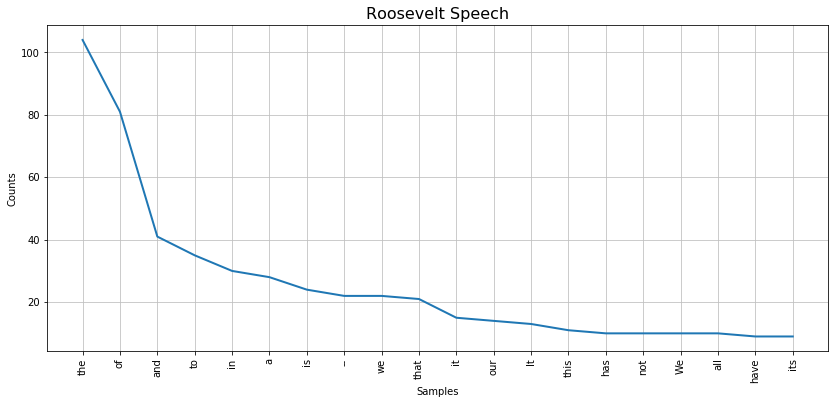

In [47]:
plt.figure(figsize=(14,6))
plt.title('Roosevelt Speech',fontsize=16)
FreqDist(words_rs).plot(20)

In [44]:
words_ks = ks.split()
print(words_ks)

['Vice', 'President', 'Johnson,', 'Mr.', 'Speaker,', 'Mr.', 'Chief', 'Justice,', 'President', 'Eisenhower,', 'Vice', 'President', 'Nixon,', 'President', 'Truman,', 'reverend', 'clergy,', 'fellow', 'citizens,', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party,', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end,', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal,', 'as', 'well', 'as', 'change.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago.', 'The', 'world', 'is', 'very', 'different', 'now.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life.', 'And', 'yet', 'the', 'same', 'revolutionary', 'beliefs', 'for', 'which', 'our', 'forebears', 'fought', 'ar

In [45]:
FreqDist(words_ks)

FreqDist({'the': 83, 'of': 65, 'and': 37, 'to': 37, 'a': 29, 'we': 27, '--': 24, 'in': 24, 'our': 21, 'not': 19, ...})

In [46]:
FreqDist(words_ks).most_common(10)

[('the', 83),
 ('of', 65),
 ('and', 37),
 ('to', 37),
 ('a', 29),
 ('we', 27),
 ('--', 24),
 ('in', 24),
 ('our', 21),
 ('not', 19)]

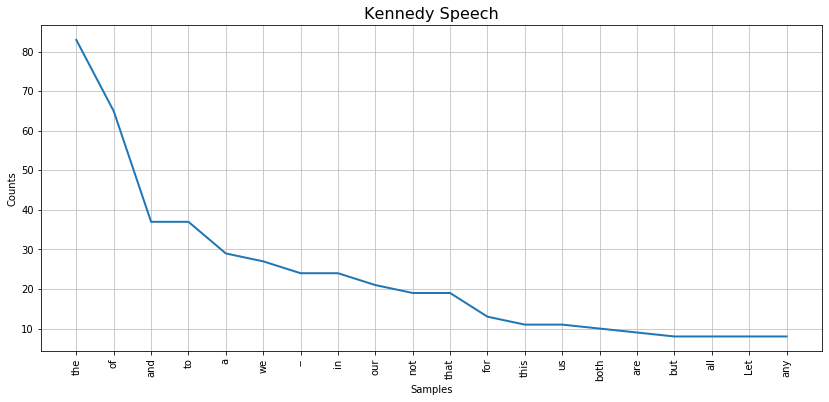

In [48]:
plt.figure(figsize=(14,6))
plt.title('Kennedy Speech',fontsize=16)
FreqDist(words_ks).plot(20)

In [49]:
word_ns = ns.split()
print(word_ns)

['Mr.', 'Vice', 'President,', 'Mr.', 'Speaker,', 'Mr.', 'Chief', 'Justice,', 'Senator', 'Cook,', 'Mrs.', 'Eisenhower,', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together:', 'When', 'we', 'met', 'here', 'four', 'years', 'ago,', 'America', 'was', 'bleak', 'in', 'spirit,', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home.', 'As', 'we', 'meet', 'here', 'today,', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world.', 'The', 'central', 'question', 'before', 'us', 'is:', 'How', 'shall', 'we', 'use', 'that', 'peace?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been:', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that', 'leads', 'to', 'stagnation', 'at', 'home', 'and', 'inv

In [50]:
FreqDist(word_ns)

FreqDist({'the': 80, 'of': 68, 'to': 65, 'in': 54, 'and': 47, 'we': 38, 'a': 34, 'that': 32, 'for': 32, 'our': 31, ...})

In [51]:
FreqDist(word_ns).most_common(10)

[('the', 80),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32),
 ('for', 32),
 ('our', 31)]

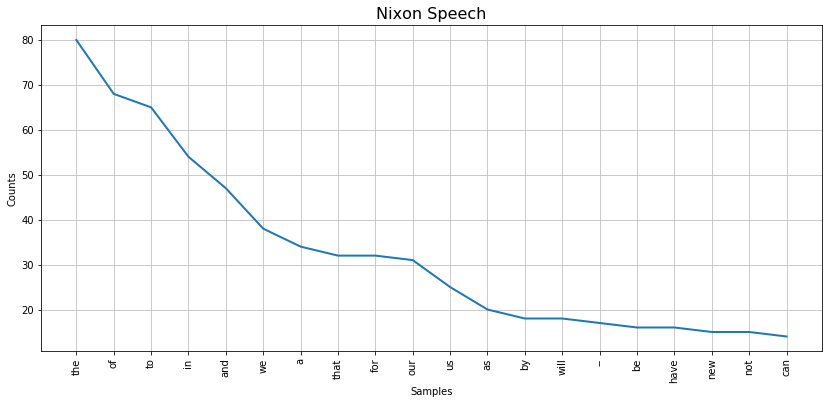

In [52]:
plt.figure(figsize=(14,6))
plt.title('Nixon Speech',fontsize=16)
FreqDist(word_ns).plot(20)

In [54]:
import pandas as pd

In [56]:
df = pd.DataFrame({'Speech': [rs, ks, ns]},index=['Roosevelt', 'Kennedy', 'Nixon'])

In [57]:
df

,Speech
Roosevelt,On each national day of inauguration since 178...
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


### Number of words

In [58]:
df['totalwords'] = [len(x.split()) for x in df['Speech'].tolist()]
df[['Speech','totalwords']].head()

,Speech,totalwords
Roosevelt,On each national day of inauguration since 178...,1360
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819


In [59]:
df['word_count'] = df['Speech'].apply(lambda x: len(str(x).split(" ")))
df[['Speech','word_count']].head()

,Speech,word_count
Roosevelt,On each national day of inauguration since 178...,1323
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


### Number of Characters- including spaces

In [63]:
df['char_count'] = df['Speech'].str.len()
df[['Speech','char_count']].head()

,Speech,char_count
Roosevelt,On each national day of inauguration since 178...,7571
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


### Average Word Length

In [64]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

df['avg_word'] = df['Speech'].apply(lambda x: avg_word(x))
df[['Speech','avg_word']].head()

,Speech,avg_word
Roosevelt,On each national day of inauguration since 178...,4.539706
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.461871
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.465091


### Number of stop Words

In [65]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Speech','stopwords']].head()

,Speech,stopwords
Roosevelt,On each national day of inauguration since 178...,632
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


### Number of Uppercase Words

In [74]:
df['uppercase_words'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Speech','uppercase_words']].head()

,Speech,uppercase_words
Roosevelt,On each national day of inauguration since 178...,3
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",14


### Number of Uppercase Letters

In [75]:
df['upper_letter'] = df['Speech'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
df[['Speech','upper_letter']].head()

,Speech,upper_letter
Roosevelt,On each national day of inauguration since 178...,119
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",94
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",132


In [76]:
df['numerics'] = df['Speech'].apply(lambda x: len(re.findall(r'[0-9]',x)))
df[['Speech','numerics']].head()

,Speech,numerics
Roosevelt,On each national day of inauguration since 178...,14
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10


In [78]:
df.drop('upper', axis=1)

,Speech,totalwords,word_count,char_count,avg_word,stopwords,upper_letter,numerics,uppercase_words
Roosevelt,On each national day of inauguration since 178...,1360,1323,7571,4.539706,632,119,14,3
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,1364,7618,4.461871,618,94,7,5
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,1769,9991,4.465091,899,132,10,14


## Basic Pre-Processing

In [80]:
df['Processed_Speech'] = df['Speech']

In [81]:
df


,Speech,totalwords,word_count,char_count,avg_word,stopwords,upper,upper_letter,numerics,uppercase_words,Processed_Speech
Roosevelt,On each national day of inauguration since 178...,1360,1323,7571,4.539706,632,3,119,14,3,On each national day of inauguration since 178...
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,1364,7618,4.461871,618,5,94,7,5,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,1769,9991,4.465091,899,14,132,10,14,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


**Lower Case conversion:**

In [82]:
df['Processed_Speech'] = df['Processed_Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Processed_Speech'].head()

Roosevelt    on each national day of inauguration since 178...
Kennedy      vice president johnson, mr. speaker, mr. chief...
Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: Processed_Speech, dtype: object

**Removal of Punctuation:**

In [84]:
df['Processed_Speech'] = df['Processed_Speech'].str.replace('[^\w\s]','')
df['Processed_Speech'].head()

Roosevelt    on each national day of inauguration since 178...
Kennedy      vice president johnson mr speaker mr chief jus...
Nixon        mr vice president mr speaker mr chief justice ...
Name: Processed_Speech, dtype: object

**Removal of StopWords**

In [85]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Processed_Speech'] = df['Processed_Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Processed_Speech'].head()

Roosevelt    national day inauguration since 1789 people re...
Kennedy      vice president johnson mr speaker mr chief jus...
Nixon        mr vice president mr speaker mr chief justice ...
Name: Processed_Speech, dtype: object

In [87]:
most_common_words = pd.Series(' '.join(df['Processed_Speech']).split()).value_counts()[:30]
most_common_words

us                46
let               39
world             27
new               26
peace             23
america           22
nation            21
nations           15
freedom           14
people            14
government        14
shall             13
know              13
years             13
history           12
responsibility    12
every             12
life              12
together          11
home              11
great             11
spirit            11
help              10
human             10
time              10
americas          10
pledge             9
faith              9
democracy          9
make               9
dtype: int64

In [88]:
rare_words = pd.Series(' '.join(df['Processed_Speech']).split()).value_counts()[-10:]
rare_words

ensure           1
product          1
odds             1
governing        1
action           1
walls            1
revitalize       1
planned          1
justification    1
bonds            1
dtype: int64

In [95]:
df['Processed_Speech']

Roosevelt    national day inauguration since 1789 people re...
Kennedy      vice president johnson mr speaker mr chief jus...
Nixon        mr vice president mr speaker mr chief justice ...
Name: Processed_Speech, dtype: object

In [107]:
df['Processed_Speech']['Roosevelt']

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material thin

In [98]:
processed_words_rs = df['Processed_Speech']['Roosevelt'].split()

In [104]:
FreqDist(processed_words_rs)

FreqDist({'nation': 11, 'know': 10, 'spirit': 9, 'democracy': 9, 'us': 8, 'life': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

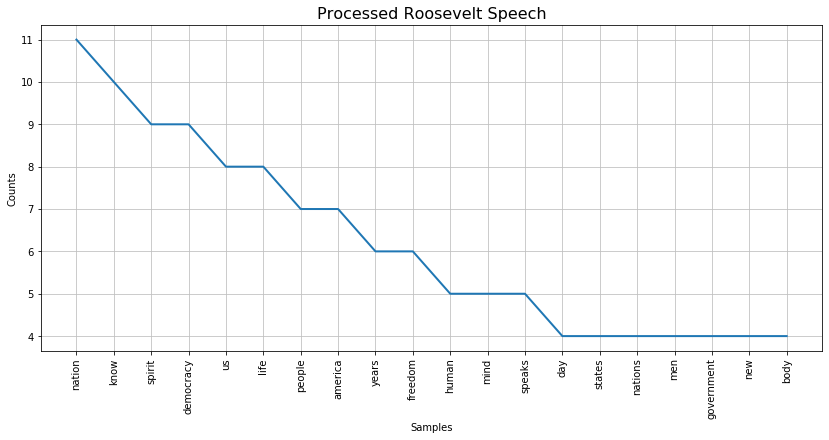

In [99]:
plt.figure(figsize=(14,6))
plt.title('Processed Roosevelt Speech',fontsize=16)
FreqDist(processed_words_rs).plot(20)

In [108]:
df['Processed_Speech']['Kennedy']

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival 

In [100]:
processed_words_kn = df['Processed_Speech']['Kennedy'].split()

In [105]:
FreqDist(processed_words_kn)

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

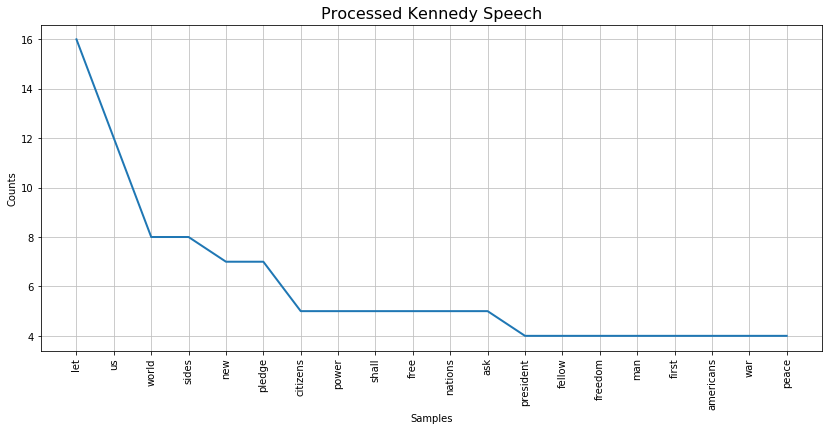

In [101]:
plt.figure(figsize=(14,6))
plt.title('Processed Kennedy Speech',fontsize=16)
FreqDist(processed_words_kn).plot(20)

In [109]:
df['Processed_Speech']['Nixon']

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations

In [102]:
processed_words_nx = df['Processed_Speech']['Nixon'].split()

In [106]:
FreqDist(processed_words_nx)

FreqDist({'us': 26, 'let': 22, 'peace': 19, 'world': 16, 'new': 15, 'america': 13, 'responsibility': 11, 'government': 10, 'great': 9, 'home': 9, ...})

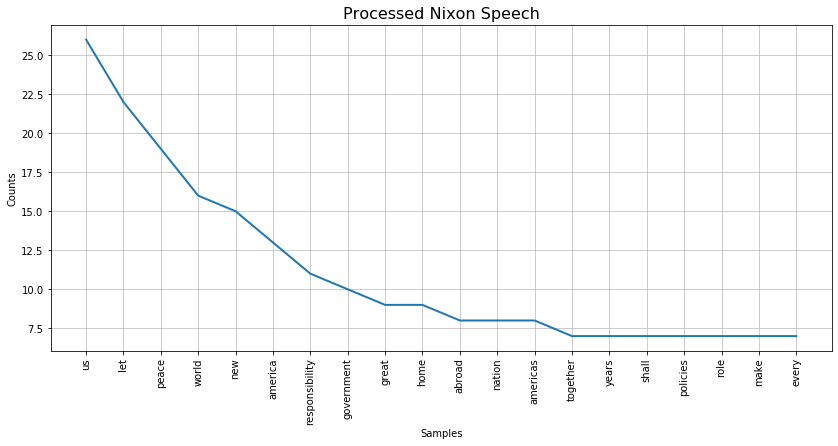

In [103]:
plt.figure(figsize=(14,6))
plt.title('Processed Nixon Speech',fontsize=16)
FreqDist(processed_words_nx).plot(20)

In [110]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Processed_Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Roosevelt    nation day inaugur sinc 1789 peopl renew sens ...
Kennedy      vice presid johnson mr speaker mr chief justic...
Nixon        mr vice presid mr speaker mr chief justic sena...
Name: Processed_Speech, dtype: object

In [122]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


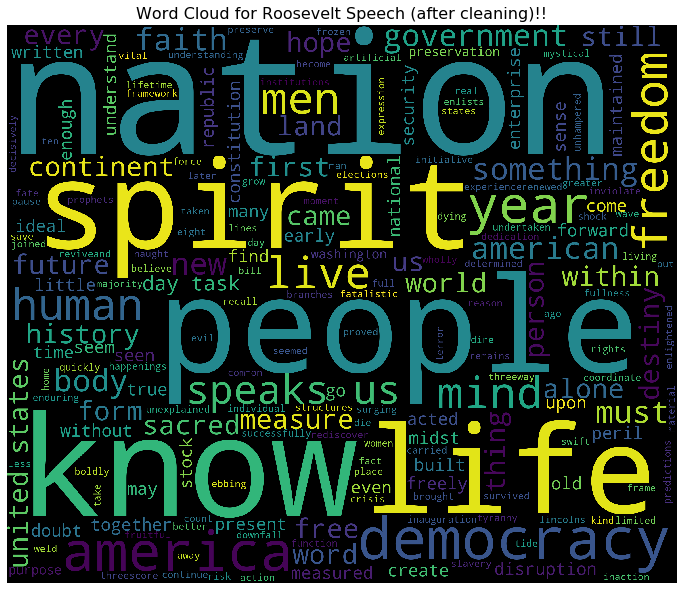

In [130]:
from wordcloud import WordCloud,STOPWORDS
words = df['Processed_Speech']['Roosevelt']
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Roosevelt Speech (after cleaning)!!',fontsize=16)
plt.show()

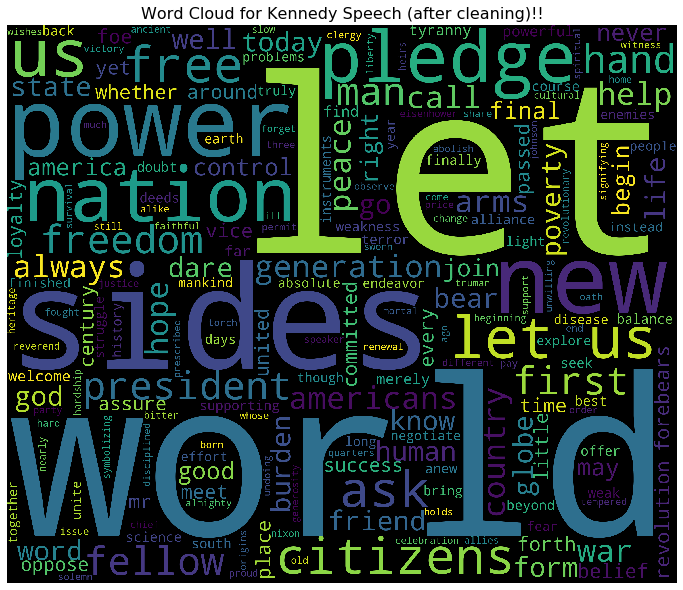

In [129]:
from wordcloud import WordCloud,STOPWORDS
words = df['Processed_Speech']['Kennedy']
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Kennedy Speech (after cleaning)!!',fontsize=16)
plt.show()

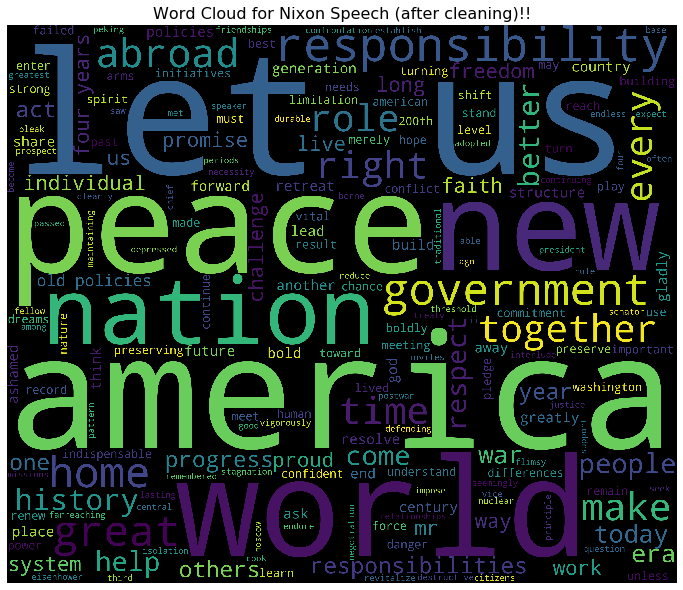

In [131]:
from wordcloud import WordCloud,STOPWORDS
words = df['Processed_Speech']['Nixon']
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Nixon Speech (after cleaning)!!',fontsize=16)
plt.show()